# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Be able to predict the salaries of various job postings

In [3]:
#import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn as sk
#etc

#your info here
__author__ = "Jared Teerlink"
__email__ = "jteerlink@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [4]:
#load the data into a Pandas dataframe
train_features = pd.read_csv('../Data/train_features.csv')
train_salaries = pd.read_csv('../Data/train_salaries.csv')
test_features = pd.read_csv('../Data/test_features.csv')


### ---- 3 Clean the data ----

In [5]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

train_features.head()

train_combined = train_features.merge(train_salaries, on = 'jobId', how = 'left')
train_combined = train_combined[train_combined.salary > 0]
train_combined.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [6]:
#Dummy Variables
major = pd.get_dummies(train_combined['major'], prefix_sep='_', drop_first=True)

industry = pd.get_dummies(train_combined['industry'], prefix_sep='_', drop_first=True)

train_combined = pd.concat([train_combined, major, industry], axis=1)

In [7]:
# Ordinal Encoding - degree and jobtype

degree = [['NONE', 'HIGH_SCHOOL', 'BACHELORS', 'MASTERS', 'DOCTORAL']]
degree_array = np.asarray(train_combined.degree).reshape(-1,1)

from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(categories=degree)
degree_ord = enc.fit_transform(degree_array)

train_combined['degree_ord'] = degree_ord
# ordered by average salary
titles = [['JANITOR', 'JUNIOR', 'SENIOR', 'MANAGER', 'VICE_PRESIDENT', 'CFO', 'CTO', 'CEO']]
titles_array = np.asarray(train_combined.jobType).reshape(-1,1)

enc = OrdinalEncoder(categories=titles)
titles_ord = enc.fit_transform(titles_array)

train_combined['jobType_ord'] = titles_ord

In [16]:
#prepare final data frames

train_num = train_combined.select_dtypes(exclude = 'object')

train_final = train_num.drop('salary',axis=1)




### ---- 4 Explore the data (EDA) ----

In [4]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

train_features.describe()

train_features.isnull().sum()


jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [31]:
train_combined.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


<BarContainer object of 5 artists>

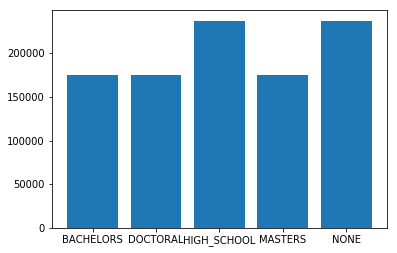

In [4]:
x = train_combined.degree.groupby(train_combined['degree']).count()

plt.bar(x.index,x)

In [12]:
numerical_features = ['yearsExperience','milesFromMetropolis']
cat_features = ['companyId','jobType','degree','major','industry']



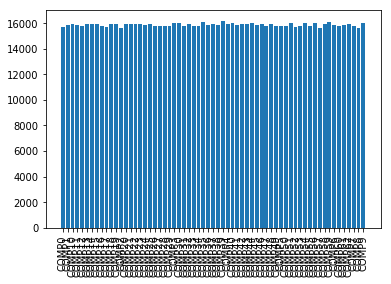

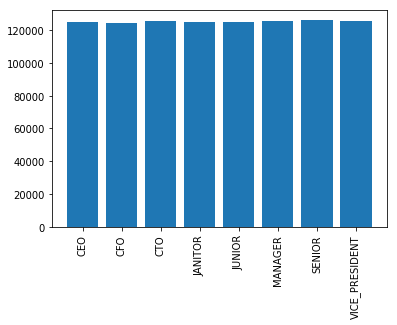

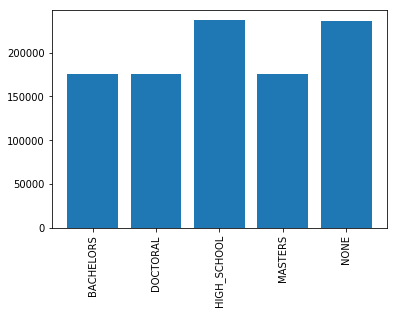

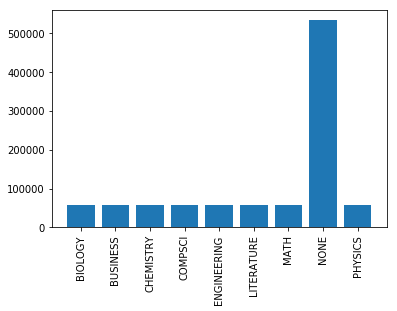

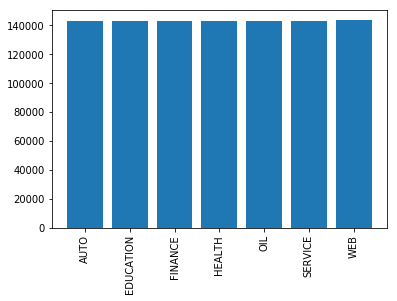

In [21]:
def cat_bar(x):
    data = x.groupby(x).count()
    plt.bar(data.index,data)
    plt.xticks(rotation=90)
    plt.show()


for i in cat_features:
    cat_bar(train_combined[i])


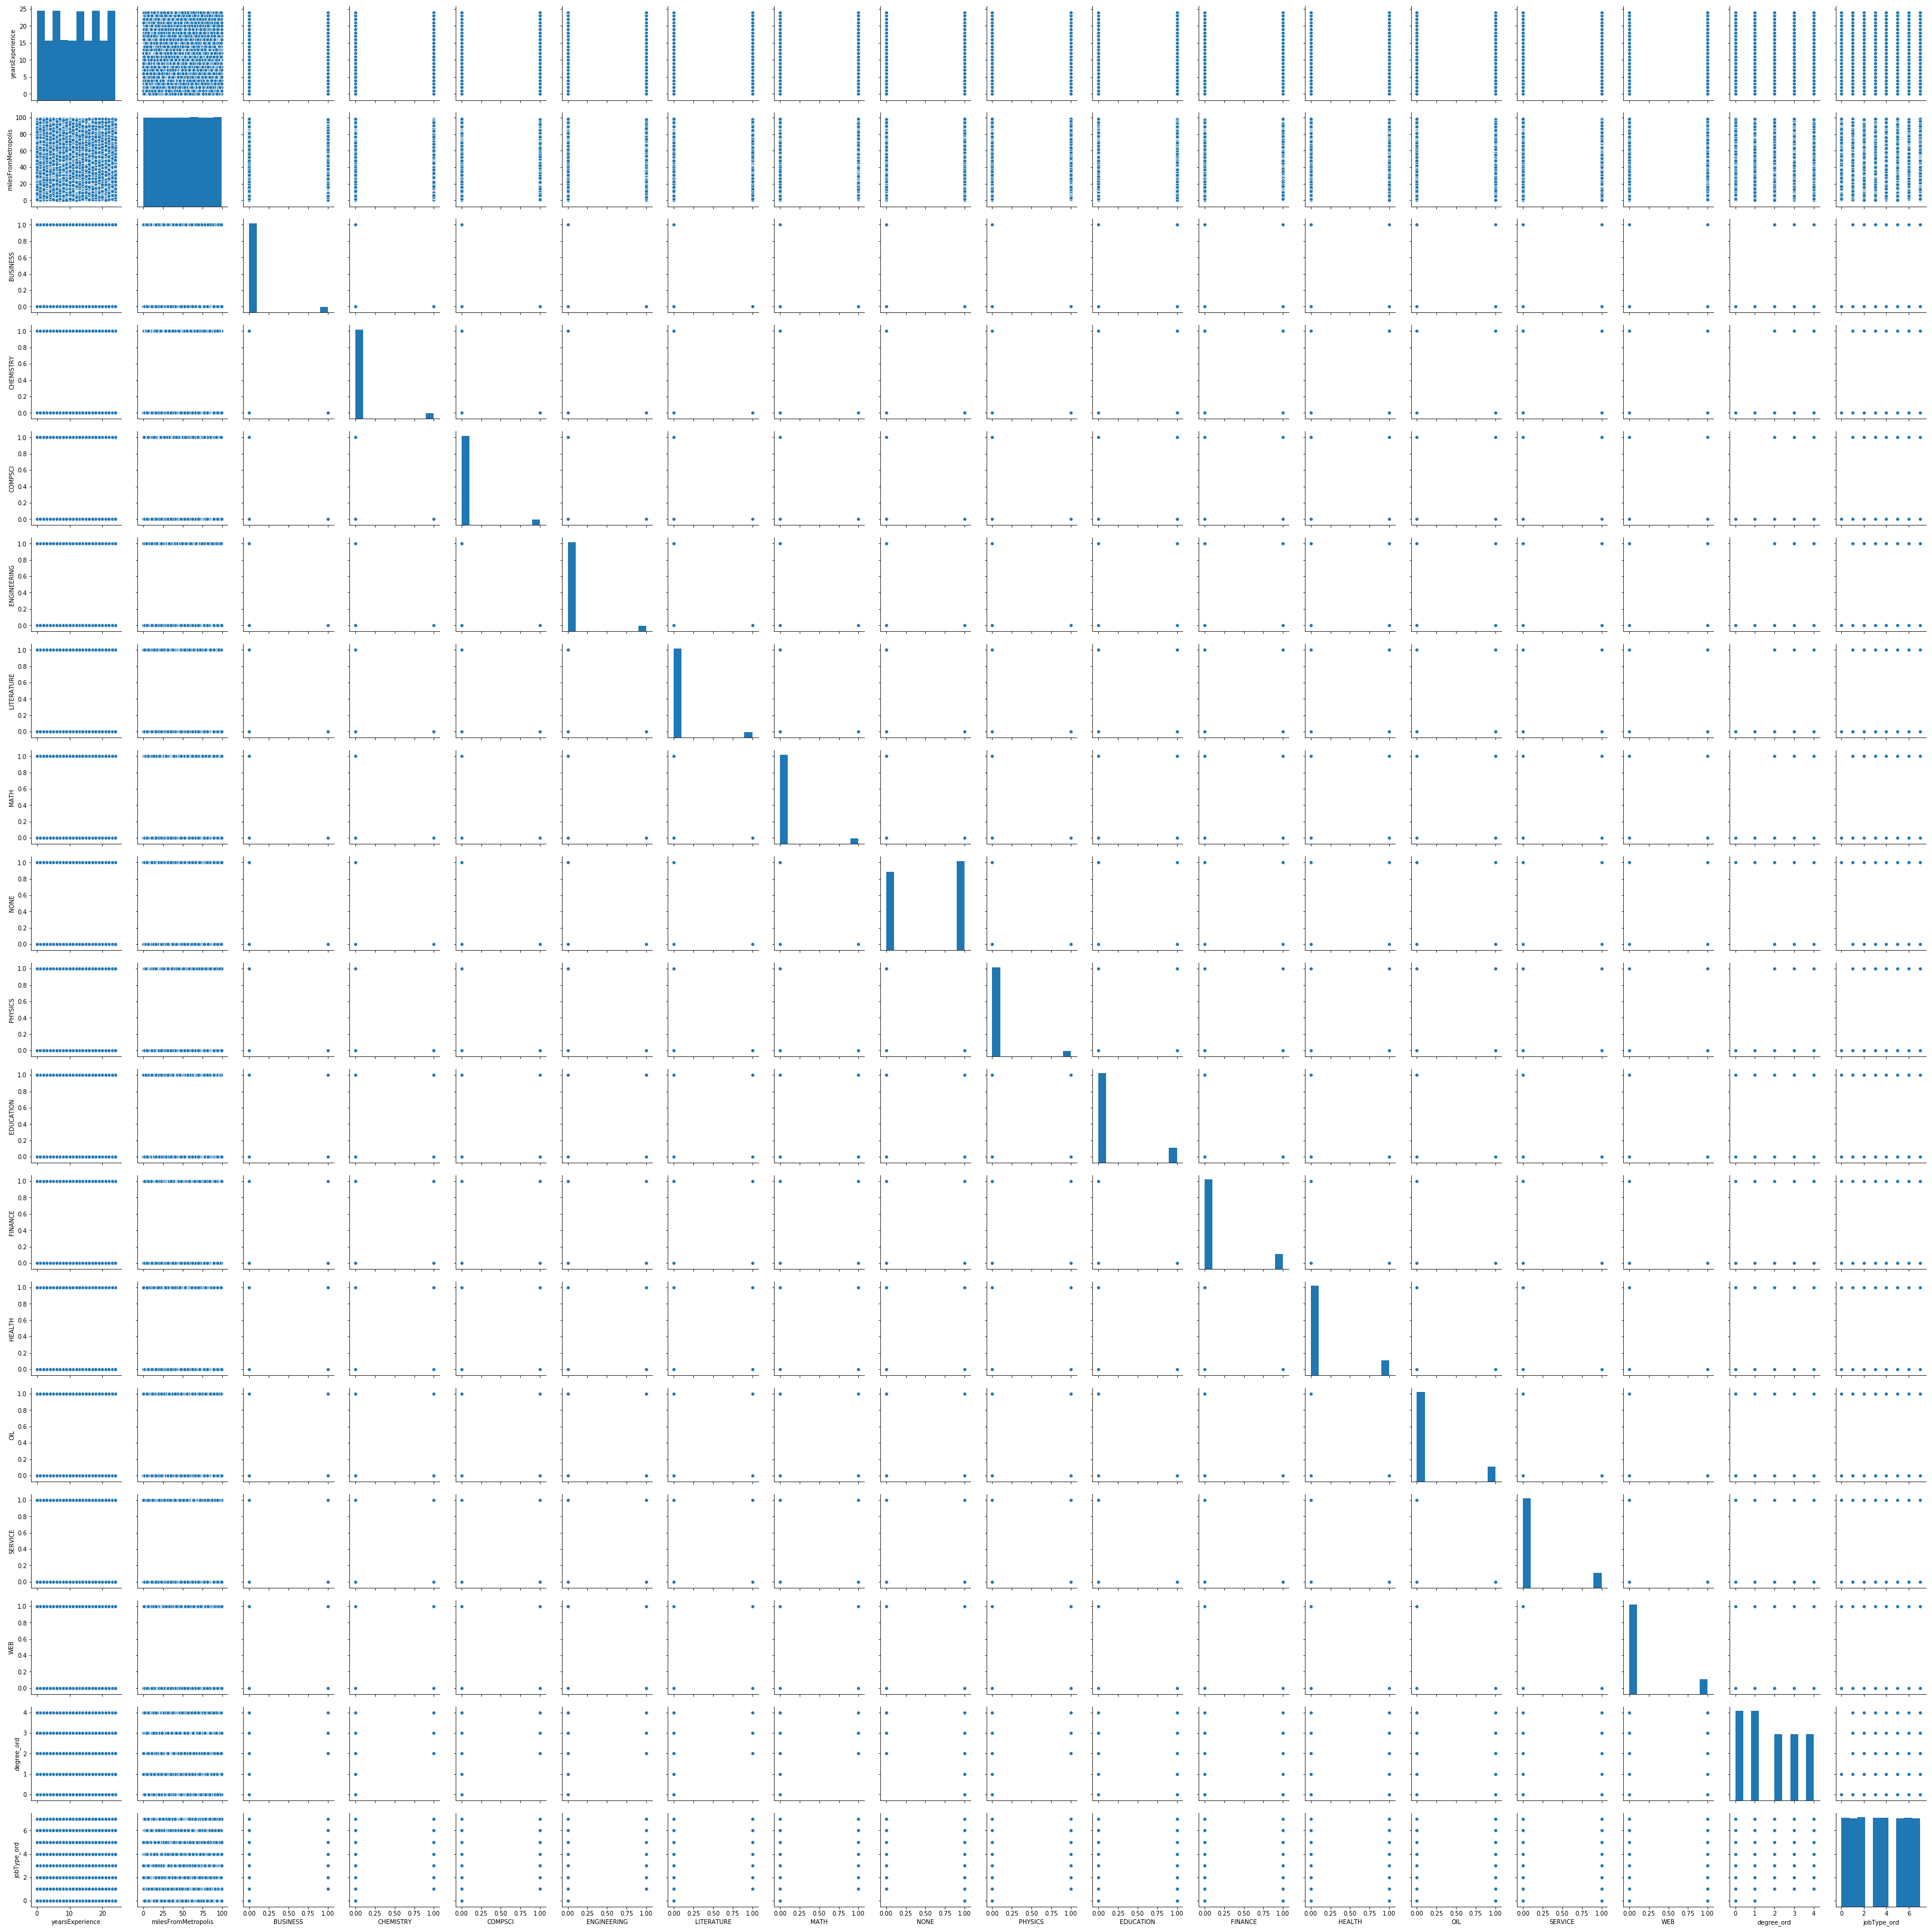

In [17]:
sns.pairplot(train_final)

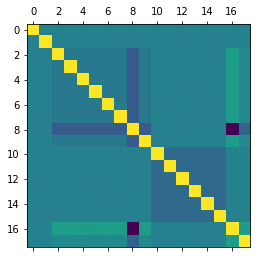

In [23]:
plt.matshow(train_final.corr())
plt.show()

In [19]:
train_final.dtypes


yearsExperience          int64
milesFromMetropolis      int64
BUSINESS                 uint8
CHEMISTRY                uint8
COMPSCI                  uint8
ENGINEERING              uint8
LITERATURE               uint8
MATH                     uint8
NONE                     uint8
PHYSICS                  uint8
EDUCATION                uint8
FINANCE                  uint8
HEALTH                   uint8
OIL                      uint8
SERVICE                  uint8
WEB                      uint8
degree_ord             float64
jobType_ord            float64
dtype: object

### ---- 5 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data